In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
le = preprocessing.LabelEncoder()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.shape

(10683, 11)

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
df.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [11]:
print(df['Source'].unique())
df['Destination'].unique()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:

df.sort_values('Date_of_Journey', inplace = True)

In [15]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [16]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

Text(0, 0.5, 'Price of ticket')

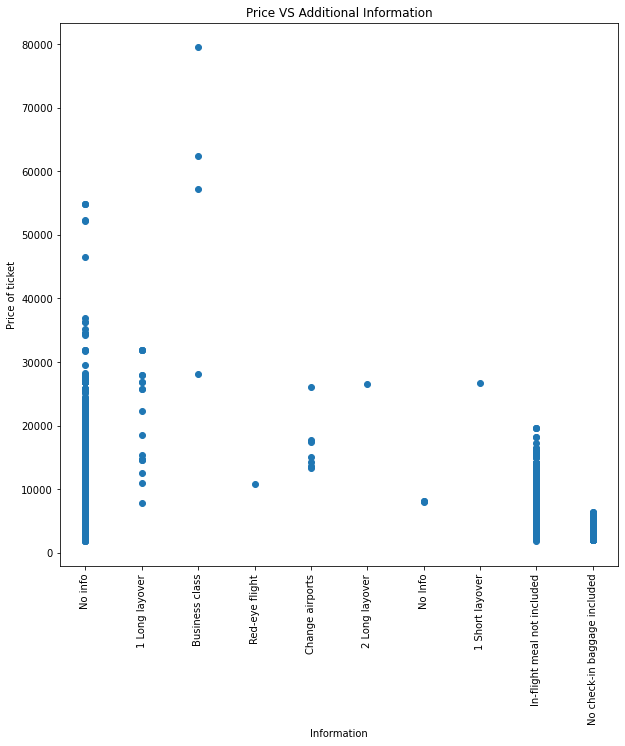

In [17]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

Text(0, 0.5, 'Count of flights')

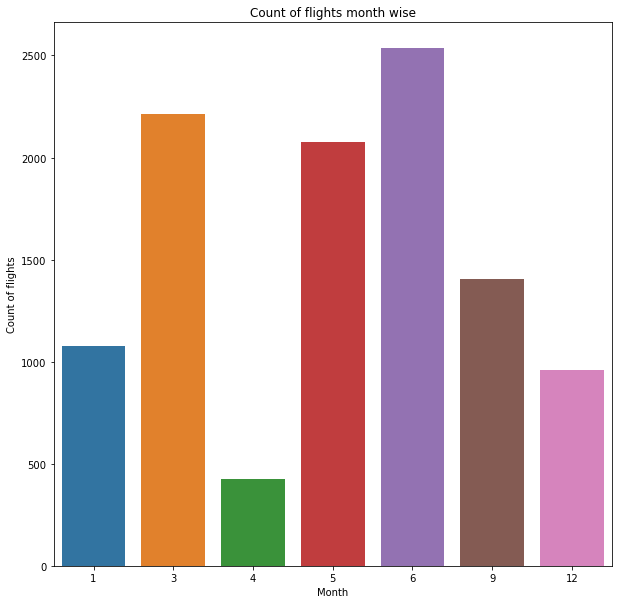

In [18]:
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

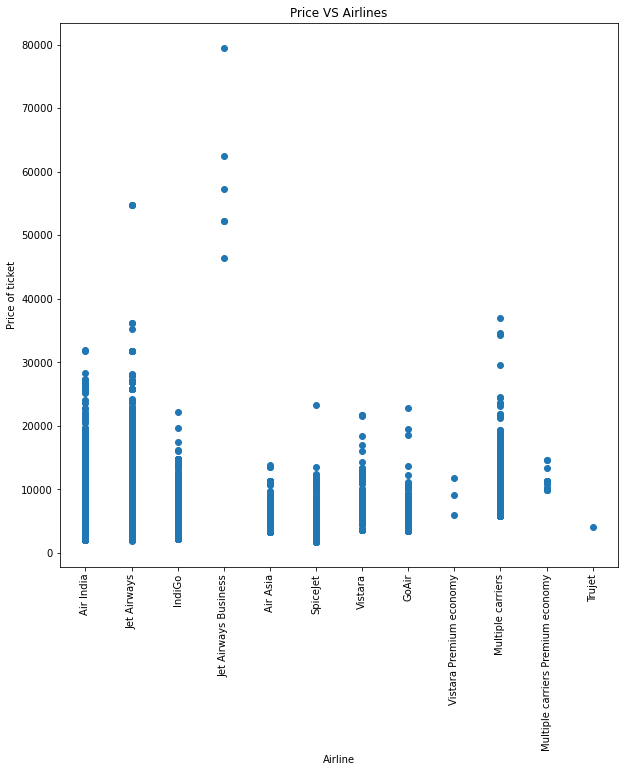

In [20]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air India'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'IndiGo'),
  Text(3, 0, 'Jet Airways Business'),
  Text(4, 0, 'Air Asia'),
  Text(5, 0, 'SpiceJet'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

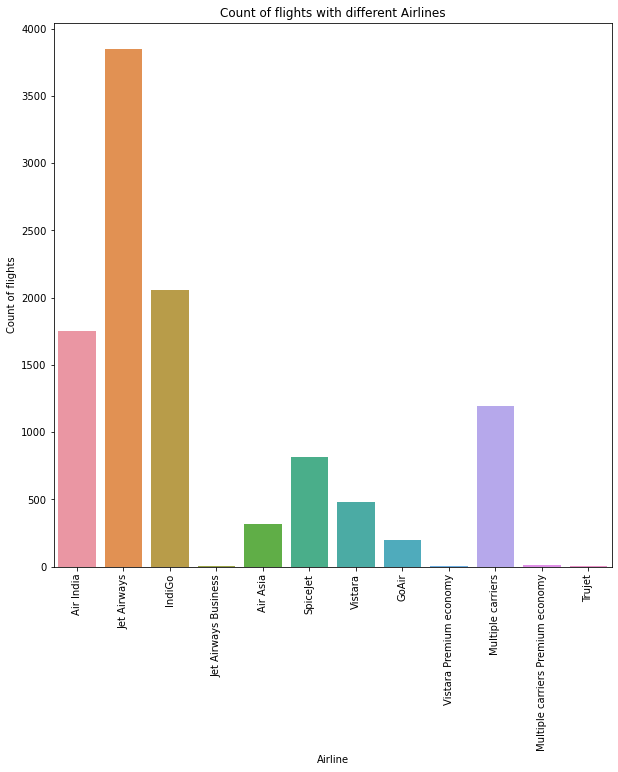

In [21]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [22]:
df['Airline'].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

In [23]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,2019,6,5


In [24]:
df.dropna(axis = 0, inplace = True)

In [29]:
def flight_dep_time(X):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [30]:
df['flight_time'] = df['Dep_Time'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

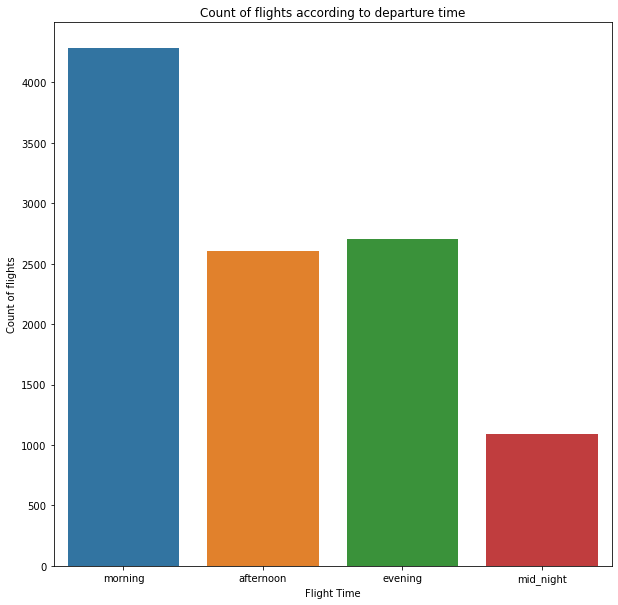

In [31]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

In [32]:
def convert_into_seconds(X):
    '''
    This function takes the total time of flight from
    one city to another and converts it into the seconds.
    '''
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

Text(0, 0.5, 'Price of ticket')

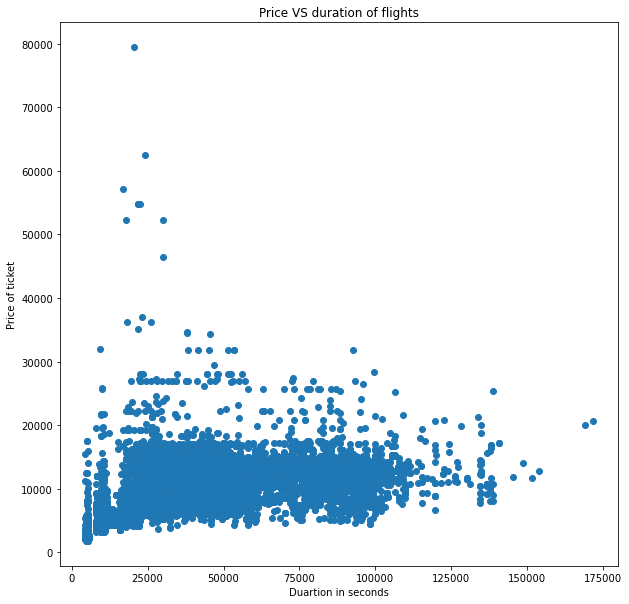

In [33]:
plt.figure(figsize = (10, 10))
plt.title('Price VS duration of flights')
plt.scatter(df['Duration(sec)'], df['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

In [34]:
df.corr()

,Price,year,month,Day,Duration(sec)
Price,1.000000,NaN,0.010705,-0.165448,0.506604
year,NaN,NaN,NaN,NaN,NaN
month,0.010705,NaN,1.000000,-0.264896,0.055147
Day,-0.165448,NaN,-0.264896,1.000000,-0.038422
Duration(sec),0.506604,NaN,0.055147,-0.038422,1.000000


In [35]:
df.shape

(10682, 16)

In [36]:
df = df.drop_duplicates()
df.shape

(10462, 16)

In [37]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [38]:
df['Additional_Info'].replace('No Info', 'No info', inplace = True)

C:\Users\Mukul Dhamija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

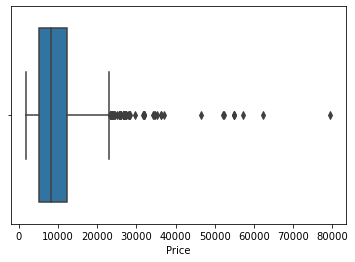

In [39]:
sns.boxplot(df['Price'])

In [41]:
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'flight_time'])

In [42]:
df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [43]:

y = df['Price']
X = df.drop('Price', axis = 1)

In [45]:
print(X.mean())
X.std()

year                                             2019.000000
month                                               5.534601
Day                                                12.630090
Duration(sec)                                   37788.587268
Airline_Air Asia                                    0.030491
Airline_Air India                                   0.161919
Airline_Another                                     0.000382
Airline_GoAir                                       0.018543
Airline_IndiGo                                      0.195278
Airline_Jet Airways                                 0.353661
Airline_Jet Airways Business                        0.000574
Airline_Multiple carriers                           0.114318
Airline_Multiple carriers Premium economy           0.001243
Airline_SpiceJet                                    0.077901
Airline_Vistara                                     0.045689
Source_Banglore                                     0.208278
Source_Chennai          

year                                                0.000000
month                                               2.995344
Day                                                 8.791635
Duration(sec)                                   30040.329769
Airline_Air Asia                                    0.171943
Airline_Air India                                   0.368394
Airline_Another                                     0.019551
Airline_GoAir                                       0.134912
Airline_IndiGo                                      0.396434
Airline_Jet Airways                                 0.478128
Airline_Jet Airways Business                        0.023942
Airline_Multiple carriers                           0.318213
Airline_Multiple carriers Premium economy           0.035230
Airline_SpiceJet                                    0.268029
Airline_Vistara                                     0.208820
Source_Banglore                                     0.406096
Source_Chennai          

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=123)

In [88]:
results = []
names = []
scoring = 'accuracy'

In [81]:
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))